# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

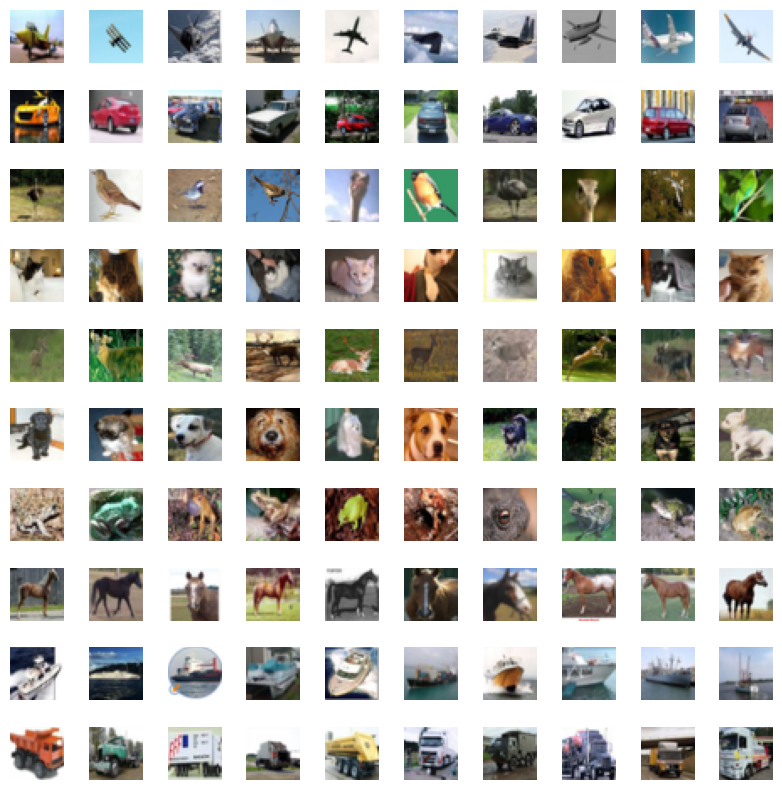

In [27]:
# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Select 10 random images per class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    selected_indices = np.random.choice(class_indices, 10, replace=False)

    for j, idx in enumerate(selected_indices):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis("off")

    axes[i, 0].set_ylabel(class_names[i], fontsize=10, rotation=45, labelpad=10)

plt.show()

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Normalize images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [28]:
from keras.backend import clear_session
clear_session()

In [37]:
# Your code here :
from tensorflow.keras import layers, models

shallow_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [38]:
# Your code here :
from tensorflow.keras.utils import to_categorical

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6219 - loss: 1.0794 - val_accuracy: 0.5834 - val_loss: 1.1818
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6247 - loss: 1.0791 - val_accuracy: 0.5894 - val_loss: 1.1796
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6257 - loss: 1.0798 - val_accuracy: 0.5806 - val_loss: 1.1798
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6267 - loss: 1.0758 - val_accuracy: 0.5714 - val_loss: 1.2085
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6331 - loss: 1.0577 - val_accuracy: 0.5931 - val_loss: 1.1515
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6384 - loss: 1.0439 - val_accuracy: 0.5809 - val_loss: 1.1828
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6376 - loss: 1.0441 - val_accuracy: 0.5979 - val_loss: 1.1418
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6440 - loss: 1.0289 - val_accuracy: 0.5931 - v

*   Plot the cross entropy loss curve and the accuracy curve

> Add blockquote



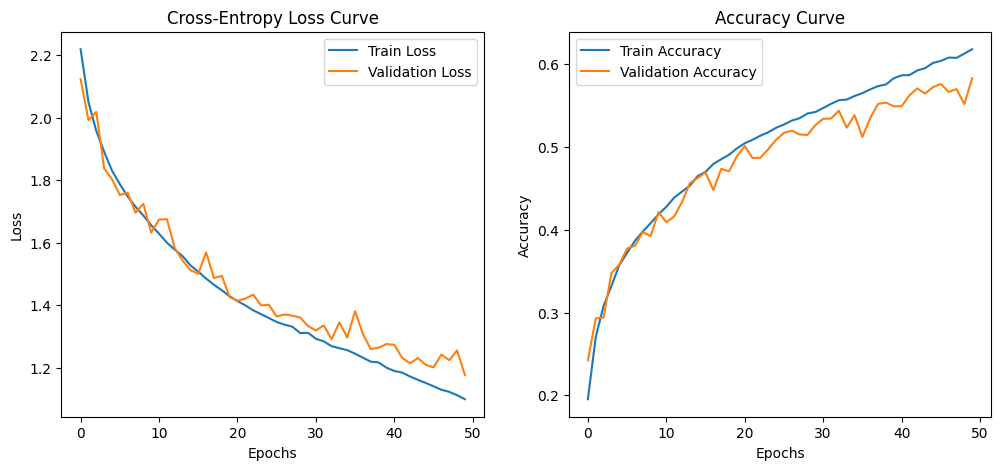

In [39]:
# Your code here :
# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [40]:
from keras.backend import clear_session
clear_session()

In [34]:
# Your code here :
# Define the VGG-inspired model
model = models.Sequential([
    # First stack of convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [41]:
# Your code here :
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 50 epochs
history_2 = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7582 - loss: 0.7064 - val_accuracy: 0.6431 - val_loss: 1.0588
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7582 - loss: 0.7026 - val_accuracy: 0.6432 - val_loss: 1.0455
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7635 - loss: 0.6857 - val_accuracy: 0.6383 - val_loss: 1.0855
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7625 - loss: 0.6905 - val_accuracy: 0.6171 - val_loss: 1.1306
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7648 - loss: 0.6869 - val_accuracy: 0.6265 - val_loss: 1.1108
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7707 - loss: 0.6707 - val_accuracy: 0.6317 - val_loss: 1.0869
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7673 - loss: 0.6726 - val_accuracy: 0.6318 - val_loss: 1.1107
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7709 - loss: 0.6613 - val_accuracy: 0.6378 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


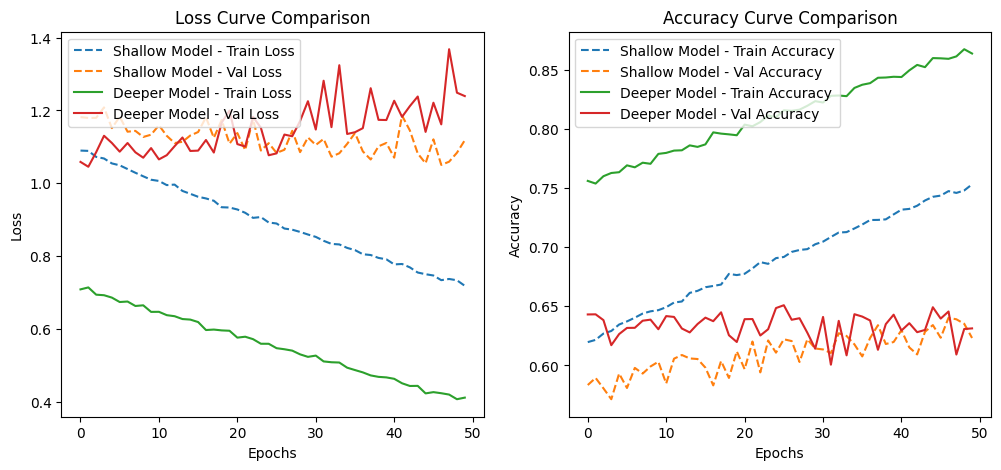

In [42]:
# Your code here :
# Extract loss and accuracy for the first (shallow) model
train_loss_1, val_loss_1 = history_1.history['loss'], history_1.history['val_loss']
train_acc_1, val_acc_1 = history_1.history['accuracy'], history_1.history['val_accuracy']

# Extract loss and accuracy for the second (deeper) model
train_loss_2, val_loss_2 = history_2.history['loss'], history_2.history['val_loss']
train_acc_2, val_acc_2 = history_2.history['accuracy'], history_2.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Plot loss comparison
plt.subplot(1, 2, 1)
plt.plot(train_loss_1, label='Shallow Model - Train Loss', linestyle='dashed')
plt.plot(val_loss_1, label='Shallow Model - Val Loss', linestyle='dashed')
plt.plot(train_loss_2, label='Deeper Model - Train Loss', linestyle='solid')
plt.plot(val_loss_2, label='Deeper Model - Val Loss', linestyle='solid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()

# Plot accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_1, label='Shallow Model - Train Accuracy', linestyle='dashed')
plt.plot(val_acc_1, label='Shallow Model - Val Accuracy', linestyle='dashed')
plt.plot(train_acc_2, label='Deeper Model - Train Accuracy', linestyle='solid')
plt.plot(val_acc_2, label='Deeper Model - Val Accuracy', linestyle='solid')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve Comparison')
plt.legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[771  25  52  32  13   6  11  11  65  14]
 [ 49 821  15  32   6   4   4   5  25  39]
 [ 80  10 543 136  72  46  60  39  10   4]
 [ 24  12  89 636  42  80  75  25   8   9]
 [ 43   3 105 133 556  17  68  63  11   1]
 [ 17  11  88 337  51 382  44  56  11   3]
 [ 13  12  55 115  44  13 730   6   4   8]
 [ 24   6  52 103  57  60  15 674   4   5]
 [118  61  23  41   5   5  18   4 717   8]
 [ 76 242  24  60   6  15  20  34  40 483]]


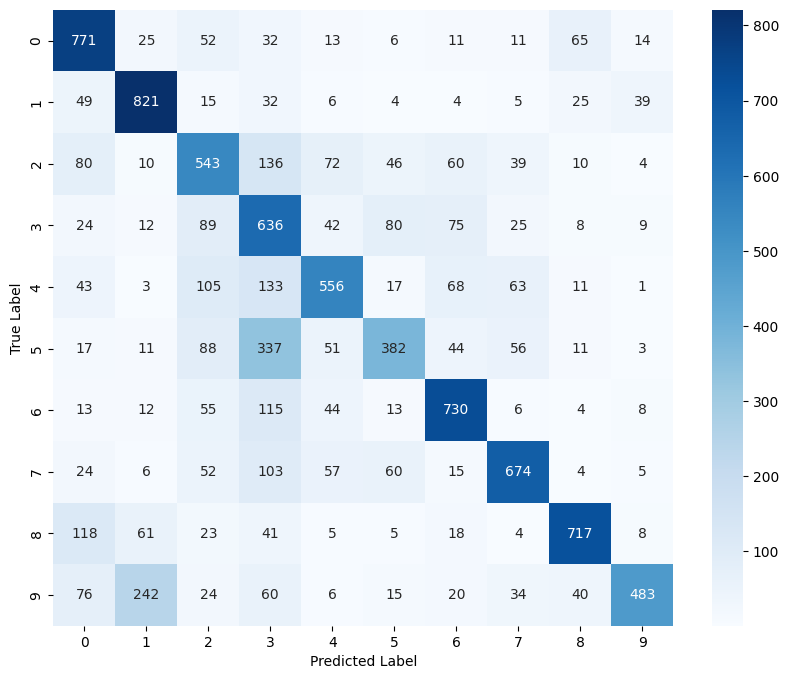

In [52]:
# Your code here :
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred_probs = model.predict(x_test)

conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

> Add blockquote



In [53]:
# Your code here :
# Evaluate the trained model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6313 - loss: 1.2299
Test Accuracy: 63.13%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [55]:
from keras.backend import clear_session
clear_session()

In [56]:
# Your code here :
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the VGG-inspired model
vgg_model = models.Sequential([
    # First block: two Conv layers with 64 filters, followed by max pooling
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second block: two Conv layers with 128 filters, followed by max pooling
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third block: two Conv layers with 256 filters, followed by max pooling
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output of the last layer
    layers.Flatten(),

    # Dense layer with 128 units
    layers.Dense(128, activation='relu'),

    # Output layer with 10 units (for CIFAR-10 classes) and softmax activation
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [57]:
# Your code here :
# Compile the model
vgg_model.compile(optimizer=tf.keras.optimizers.SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
vgg_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

- They add weights to the inputs to remove liniarity to the model

2 - Key Differences between sigmoid and softmax:

Sigmoid:
- Used for binary classification problems.
- The output can be interpreted as the probability of the instance belonging to a specific class.

Softmax:
- Used for multi-class classification problems.
- Outputs a vector of probabilities that sum to 1. Each value represents the probability of the input belonging to each class.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical Crossentropy:

- Used for multi-class classification problems where each input is assigned to one of the multiple classes.
- The target labels are usually one-hot encoded (i.e., a vector with all zeros except for the class index).

Binary Crossentropy:
- Used for binary classification problems, where the task is to classify inputs into two classes.
- The target label is either 0 or 1, and the output is a single probability value for one of the two classes.
